In [4]:
#!pip install rasterio
#!pip install scikit-image
#!pip install matplotlib


  Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp39-cp39-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp39-cp39-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl (55 kB)


In [16]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, measure, feature
from scipy.ndimage import gaussian_filter


In [13]:
# URL of the .tif file. URL to 1/3 arcsecond (10m) National Elevation Dataset DEM 
DEM_url = 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1/TIFF/historical/n35w111/USGS_1_n35w111_20240402.tif'

## Functions

In [14]:
#  Function Load DEM
def load_dem(DEM_url):
    with rasterio.open(DEM_url) as dataset:
        dem = dataset.read(1) # read the first band
        return dem

# Apply Gaussian smoothing and Sobel edge detection
def apply_sobel_filter(dem_data, sigma=1.0):
    smoothed_dem = gaussian_filter(dem_data, sigma=sigma)  # Apply Gaussian smoothing
    sobel_edges = filters.sobel(smoothed_dem)  # Sobel edge detection
    return sobel_edges

# Extract contours from Sobel edges
def extract_contours(edges, level=0.2):
    contours = measure.find_contours(edges, level=level)
    return contours

# Plot the DEM, edges, and contours
def plot_results(dem, edges, contours):
    fig, ax = plt.subplots(1, 3, figsize=(18, 7))
    
    # Original DEM
    ax[0].imshow(dem, cmap='terrain')
    ax[0].set_title('Original DEM')
    ax[0].axis('off')
    
    # Sobel Edge Detection
    ax[1].imshow(edges, cmap='gray')
    ax[1].set_title('Detected Lineaments (Sobel Filter)')
    ax[1].axis('off')
    
    # Contours on DEM
    ax[2].imshow(dem, cmap='terrain')
    for contour in contours:
        ax[2].plot(contour[:, 1], contour[:, 0], linewidth=2, color='red')
    ax[2].set_title('Contours from Edges')
    ax[2].axis('off')
    
    plt.show()

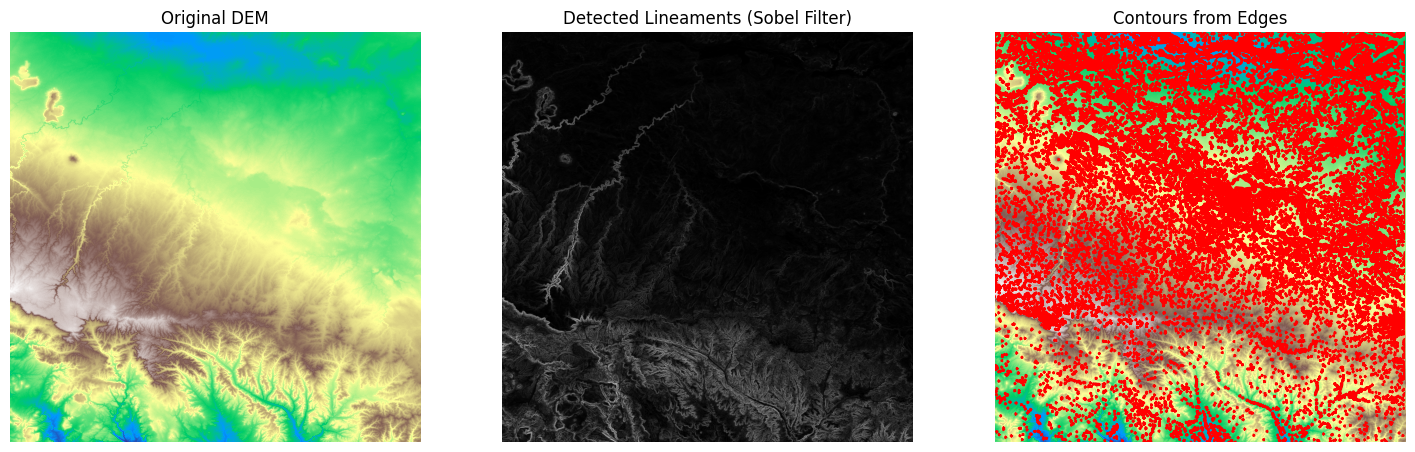

In [17]:
# Load DEM
dem_data = load_dem(DEM_url)

# Apply Sobel filter with Gaussian smoothing (you can adjust sigma for different levels of smoothing)
sigma_value = 2.0  # Adjust the smoothing level
edges = apply_sobel_filter(dem_data, sigma=sigma_value)

# Extract contours from the detected edges (you can adjust the level for contour detection)
contour_level = 0.2  # Adjust this value to refine contour extraction
contours = extract_contours(edges, level=contour_level)

# Plot the results
plot_results(dem_data, edges, contours)

In [18]:
dem_data = None
edges = None
contours = None